In [46]:
%pylab inline
import numpy as np

import seaborn as sns
import glob2
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
import natsort


Populating the interactive namespace from numpy and matplotlib


In [47]:
def get_dataframe():
    file_ = '../output/tect_model_data.npz'
    out = np.load(file_)
    d = dict(out)
    df = pd.DataFrame.from_dict(d)
    return df 

In [48]:
df = get_dataframe( )


In [49]:
df

,"(2, 2)","(2, 3)","(3, 3)",stepAtSave,timeAtSave
0,-0.862069,0.200000,0.862069,0,0.000000e+00
1,-0.862069,0.200551,0.862069,2,3.507092e-07
2,-0.862069,0.200551,0.862069,4,6.975724e-07
3,-0.862069,0.200551,0.862069,6,1.056139e-06
4,-0.862069,0.200551,0.862069,8,1.416060e-06
5,-0.862069,0.200551,0.862069,10,1.780006e-06
6,-0.862069,0.200551,0.862069,12,2.151121e-06


In [50]:
velScale = 3.4482758620689656e-13*(3600*24*365)*100.  #cm/y
timeScale = 8.41e+18/(1e6*3600*24*365)    

In [51]:
df.columns

Index([u'(2, 2)', u'(2, 3)', u'(3, 3)', u'stepAtSave', u'timeAtSave'], dtype='object')

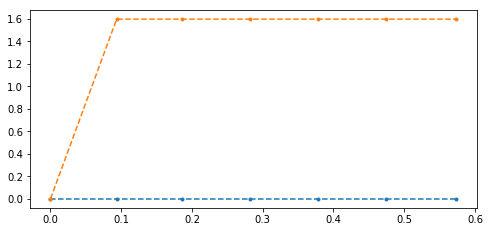

In [52]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(211)


#ax.plot(df['timeAtSave']*timeScale, df['(1, 1)']*2900 - df['(1, 1)'][0]*2900, 
#        marker='.',label  = '', ls = '-')


ax.plot(df['timeAtSave']*timeScale, df['(3, 3)']*2900 - df['(3, 3)'][0]*2900, 
        marker='.',label  = '', ls = '--')

#ax.plot(df['timeAtSave']*timeScale, df['(1, 2)']*2900 - df['(1, 2)'][0]*2900, 
#marker='.',label  = '', ls = '--')

ax.plot(df['timeAtSave']*timeScale, df['(2, 3)']*2900 - df['(2, 3)'][0]*2900, 
        marker='.',label  = '', ls = '--')

## Surface vels

In [53]:
def listify_data(unique_string, path):
    glob_str = path + '*' + unique_string + '*'
    files = natsort.natsort(glob2.glob(glob_str))
    #print(glob_str)
    #return files
    
    dataList = []
    for f in files:
        with h5py.File(f,'r') as hf:
            data = hf.get('data')
            dataList.append(np.array(data))
    return dataList

In [54]:
vx = listify_data('surfVx', '../output/files/')

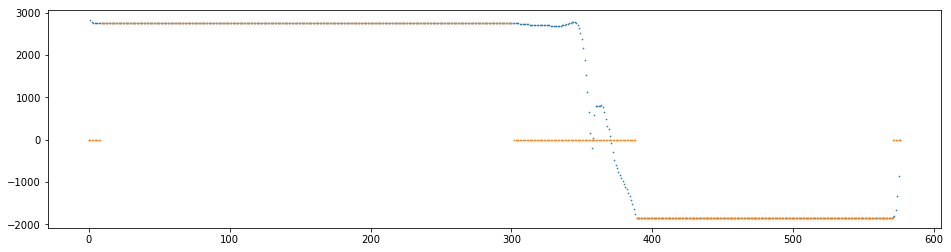

In [58]:
fig, ax = plt.subplots(figsize=(16,4))
for v in vx[0:]:
    ax.scatter(np.arange(len(v)), v, s=0.4)